In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('bank.csv', sep=';')

In [3]:
df1.head()

age          job  marital  education default  balance housing loan   
0   30   unemployed  married    primary      no     1787      no   no  \
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [4]:
df1.shape

(4521, 17)

In [5]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
df1.describe().astype(np.int64)

age  balance   day  duration  campaign  pdays  previous
count  4521     4521  4521      4521      4521   4521      4521
mean     41     1422    15       263         2     39         0
std      10     3009     8       259         3    100         1
min      19    -3313     1         4         1     -1         0
25%      33       69     9       104         1     -1         0
50%      39      444    16       185         2     -1         0
75%      49     1480    21       329         3     -1         0
max      87    71188    31      3025        50    871        25

In [8]:
df1.duplicated().sum()

0

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'previous'}>]], dtype=object)

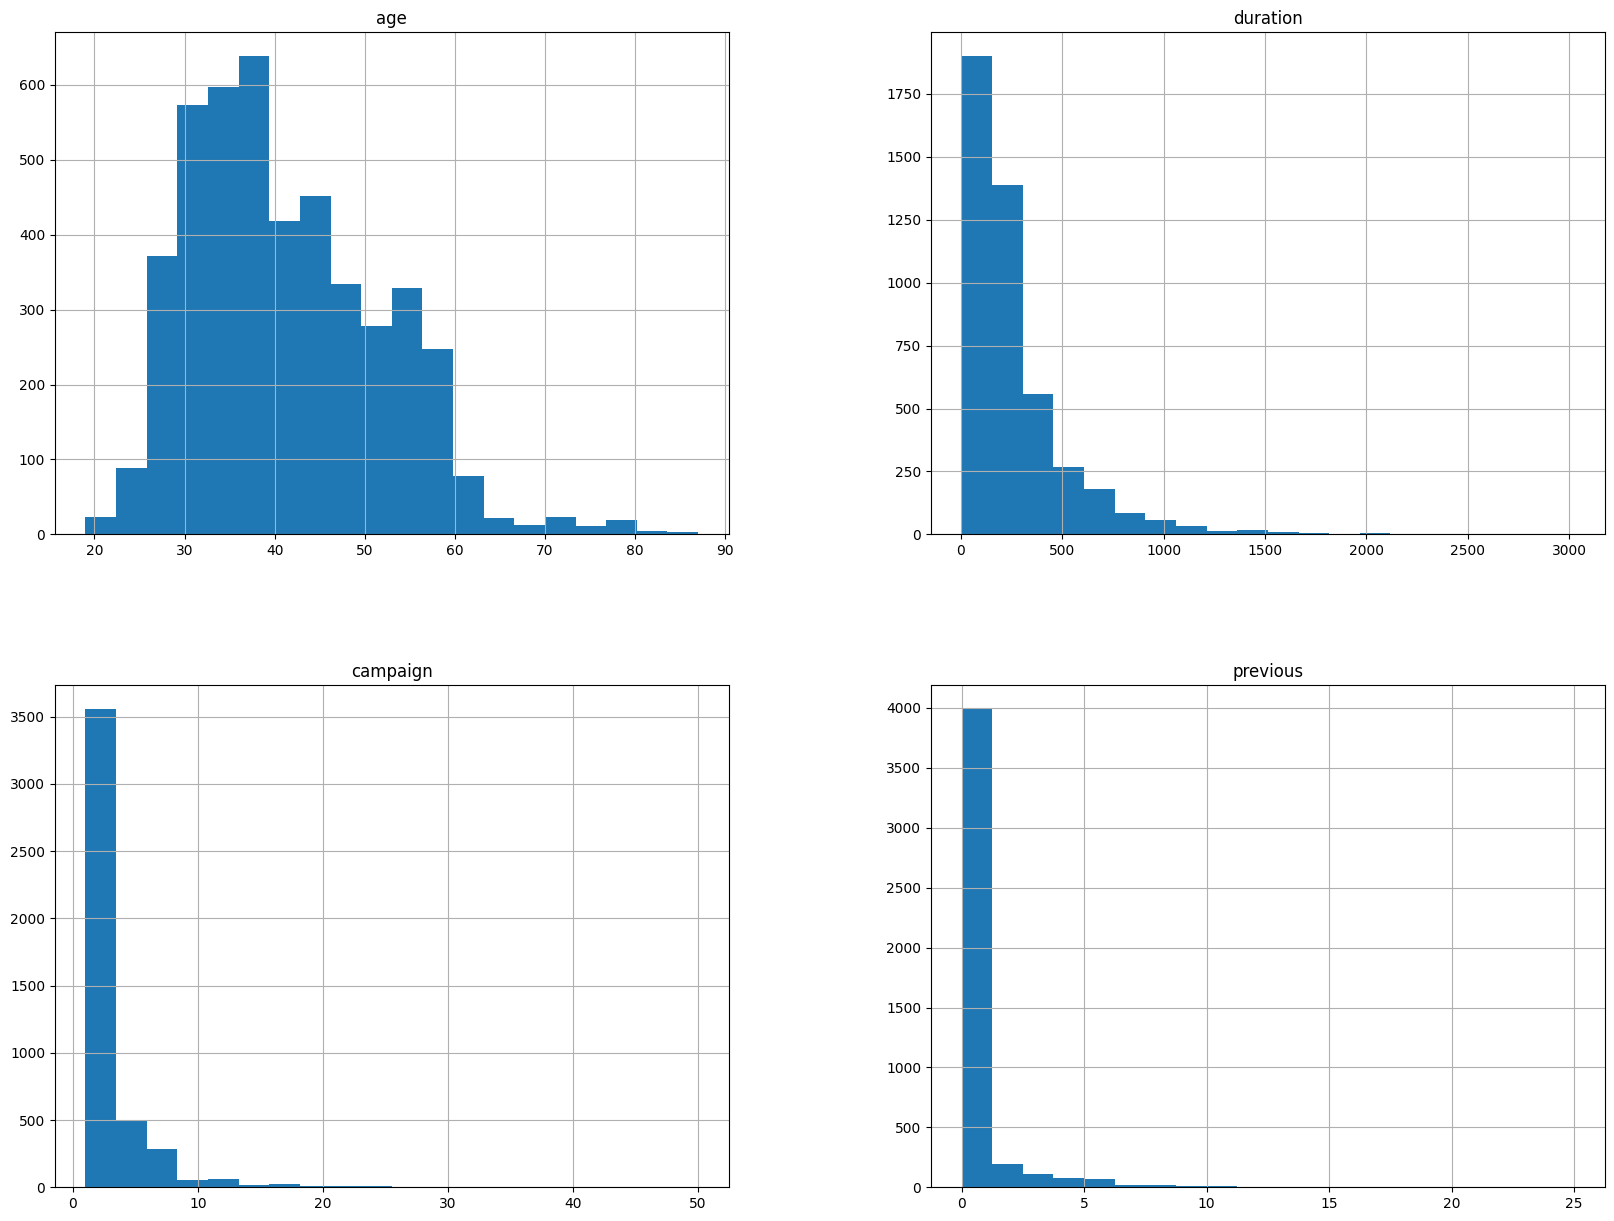

In [9]:
df1[['age', 'duration', 'campaign', 'previous']].hist(bins=20, figsize=(20,15))

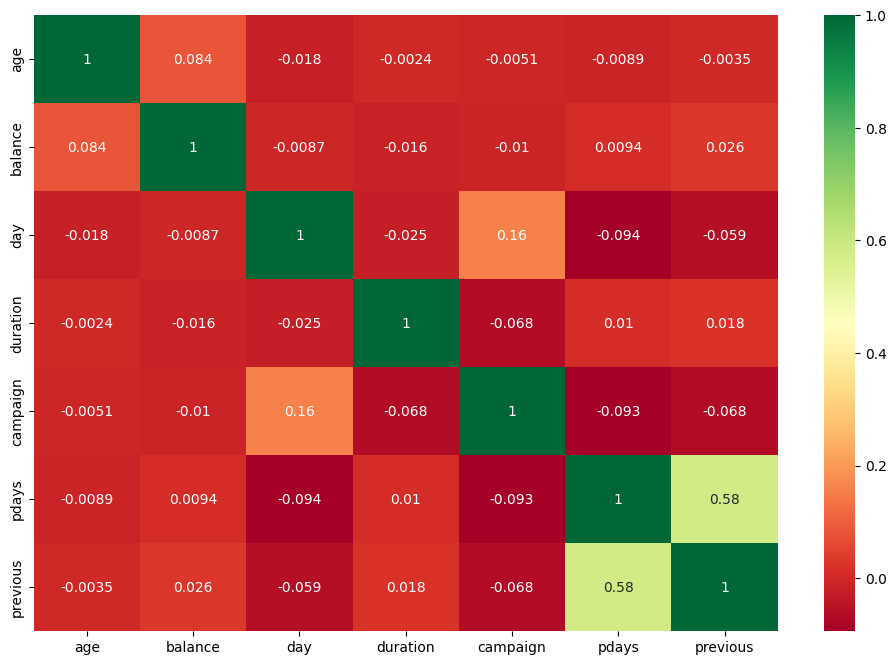

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df1._get_numeric_data().astype(float).corr(), annot=True, cmap='RdYlGn')
plt.show()

In [11]:
category_feat = df1.select_dtypes(include=['object', 'bool']).columns.values

In [12]:
for col in category_feat:
    print(f'{col} ( {len(df1[col].unique())} values): \n {np.sort(df1[col].unique())} \n')

job ( 12 values): 
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown'] 

marital ( 3 values): 
 ['divorced' 'married' 'single'] 

education ( 4 values): 
 ['primary' 'secondary' 'tertiary' 'unknown'] 

default ( 2 values): 
 ['no' 'yes'] 

housing ( 2 values): 
 ['no' 'yes'] 

loan ( 2 values): 
 ['no' 'yes'] 

contact ( 3 values): 
 ['cellular' 'telephone' 'unknown'] 

month ( 12 values): 
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep'] 

poutcome ( 4 values): 
 ['failure' 'other' 'success' 'unknown'] 

y ( 2 values): 
 ['no' 'yes'] 



In [13]:
for col in category_feat:
    print(f'{df1[col].value_counts()} \n')

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64 

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64 

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64 

default
no     4445
yes      76
Name: count, dtype: int64 

housing
yes    2559
no     1962
Name: count, dtype: int64 

loan
no     3830
yes     691
Name: count, dtype: int64 

contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64 

month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64 

poutcome
unknown    3705
failure     490
other       197
success     129
N

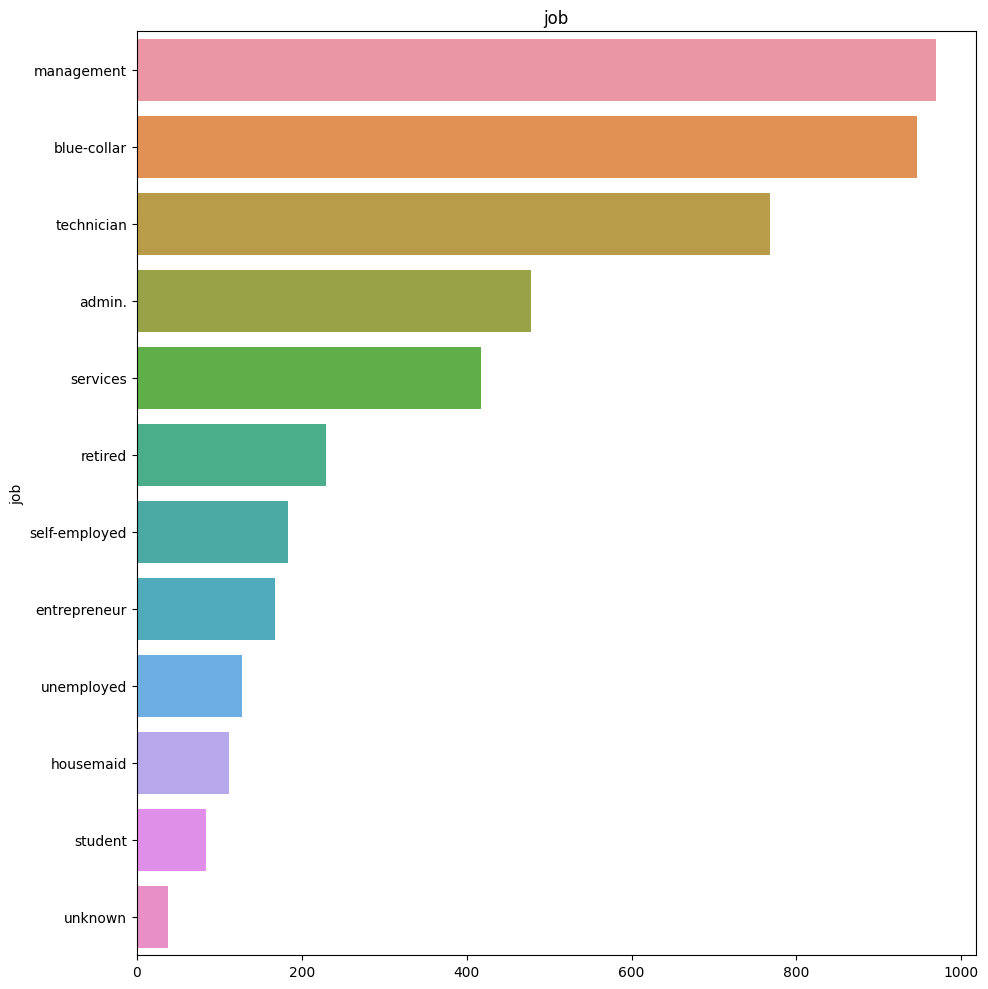

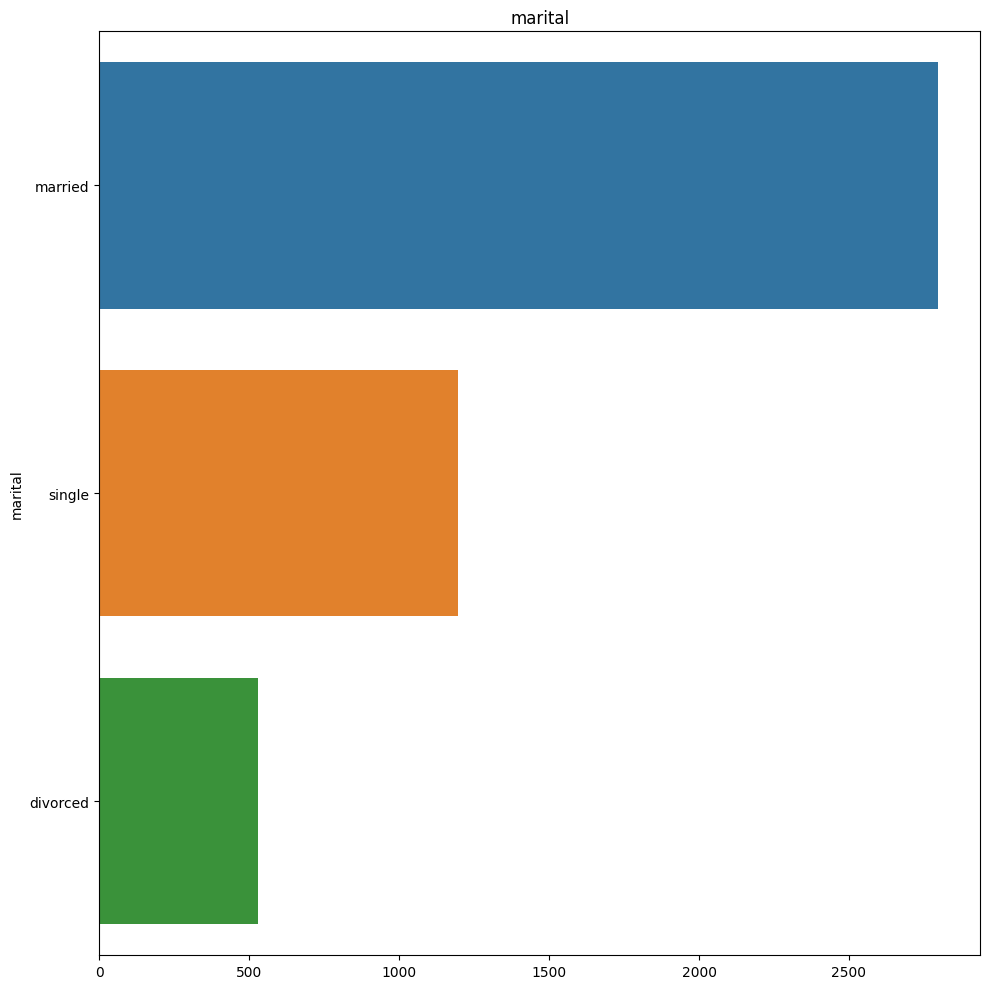

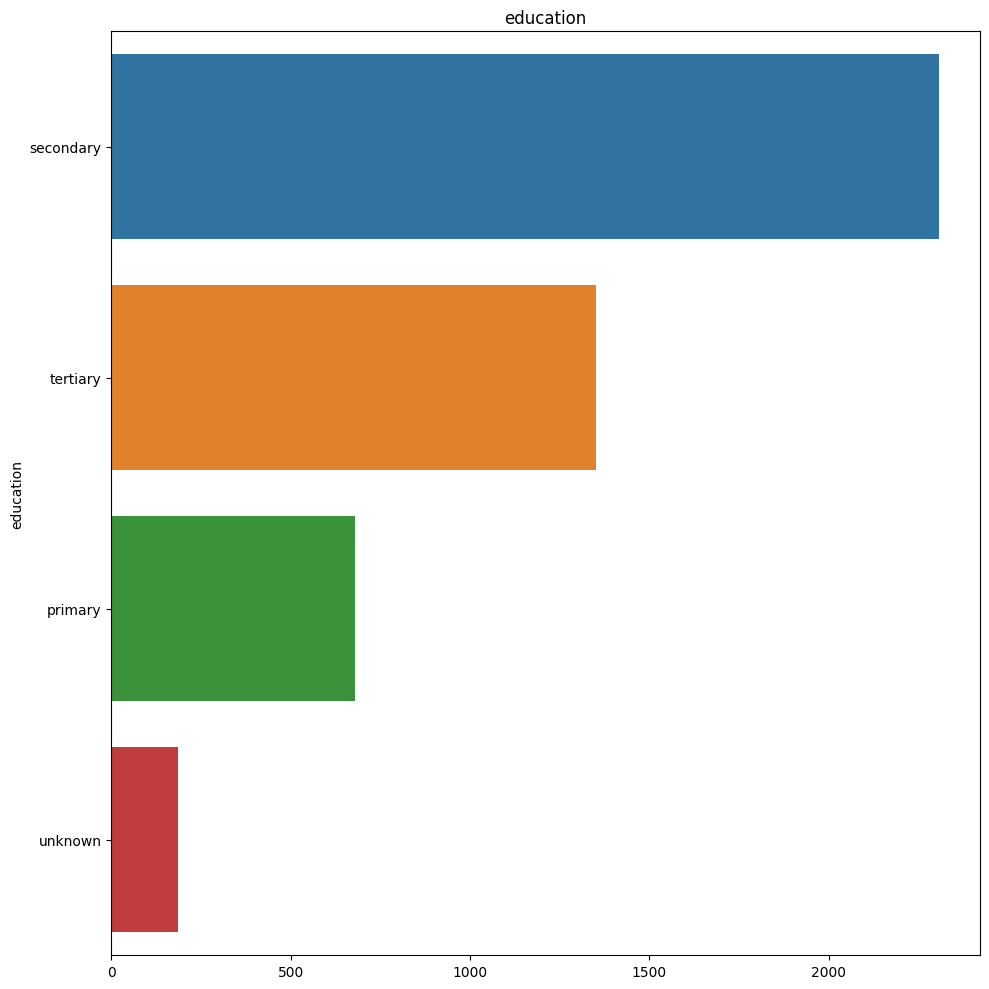

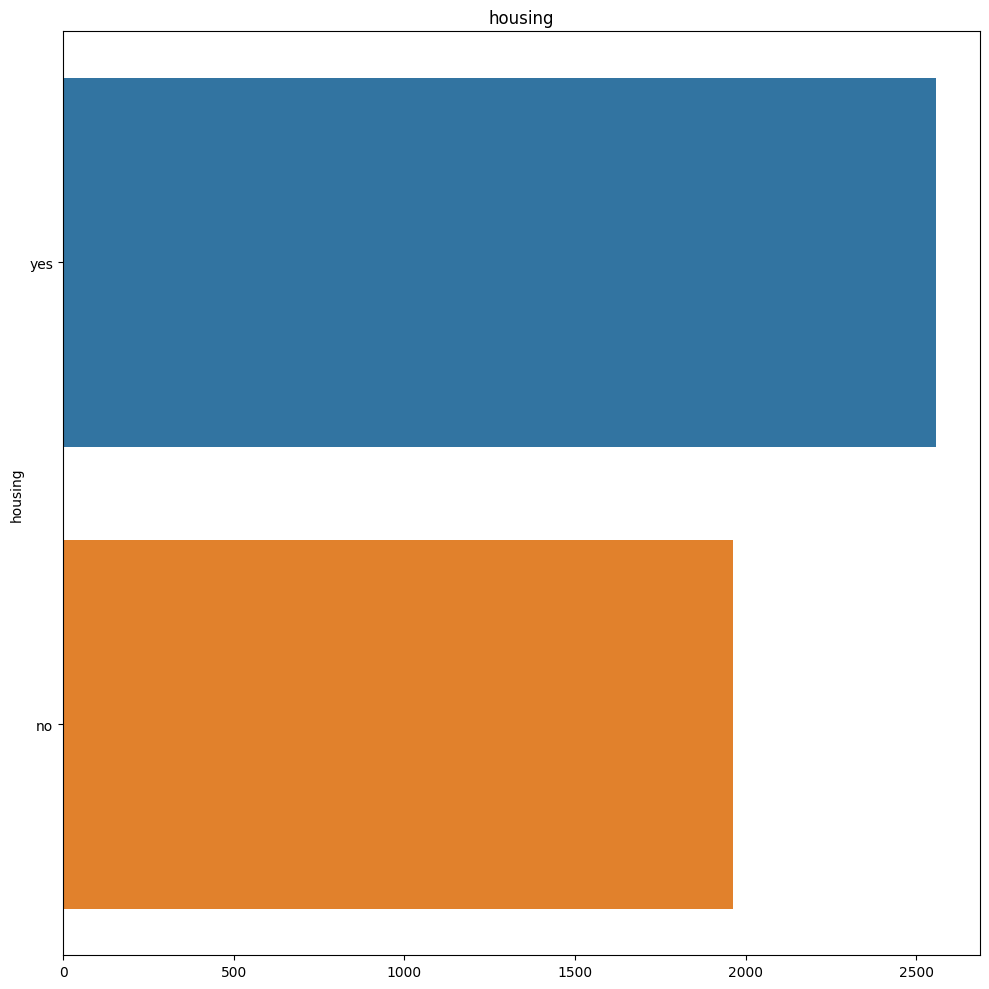

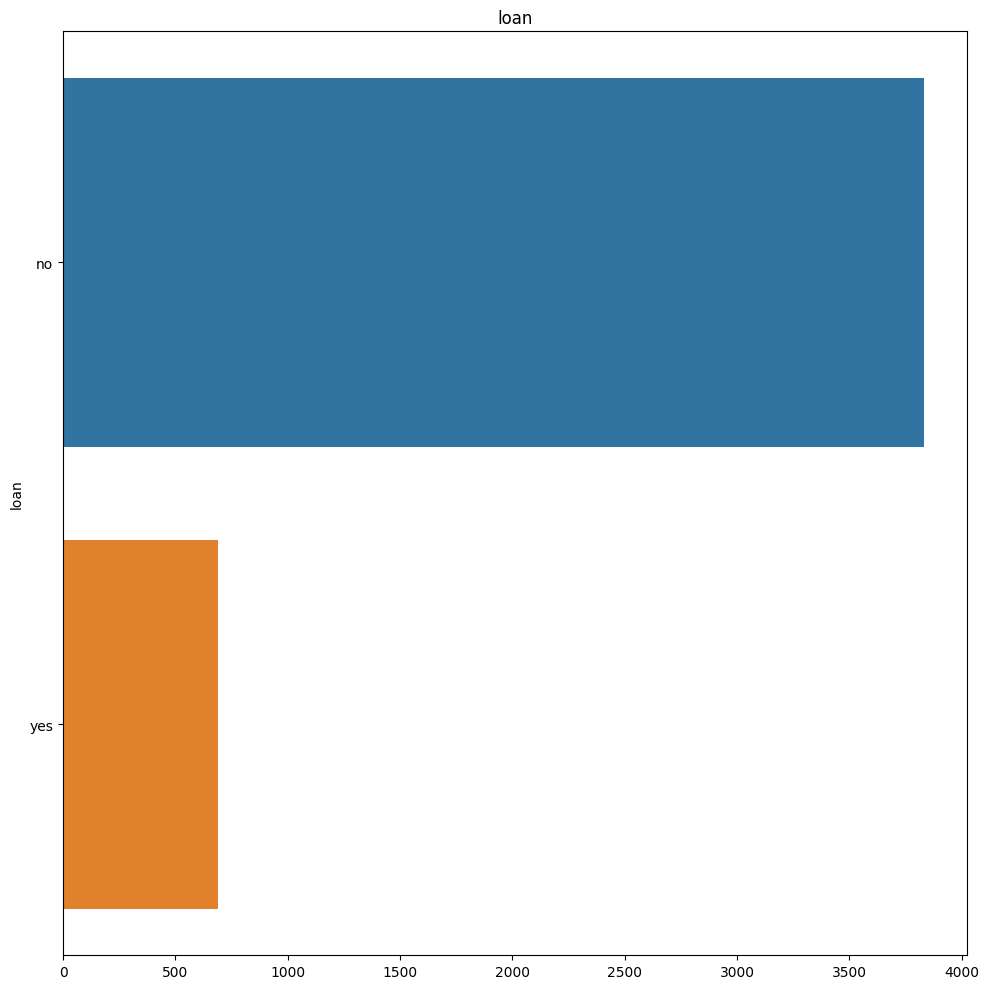

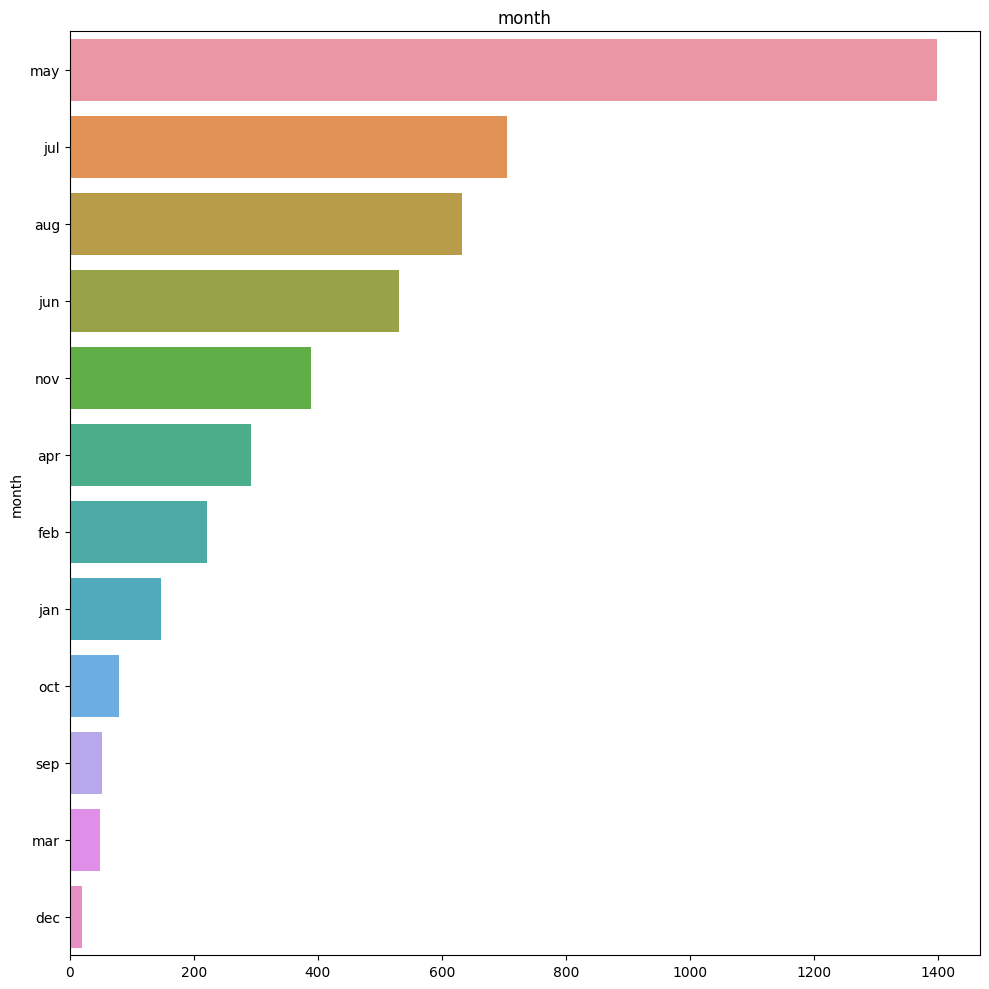

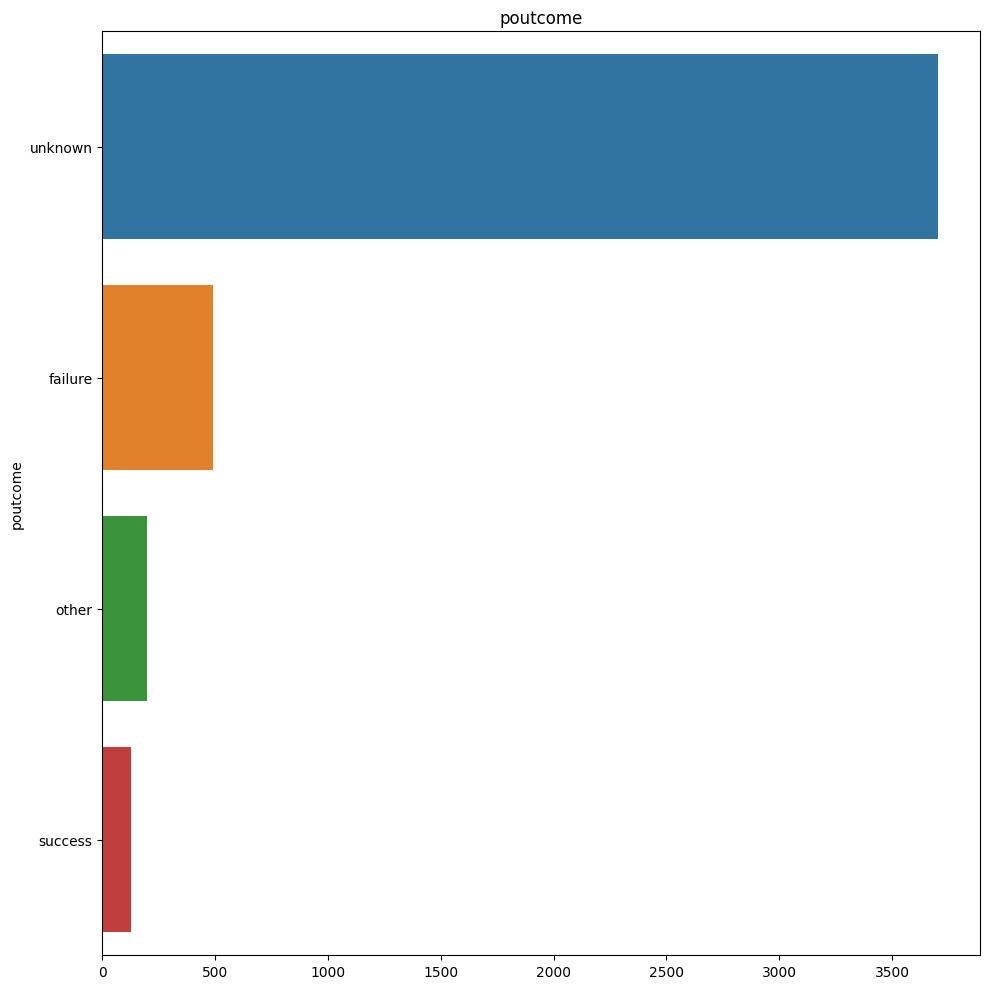

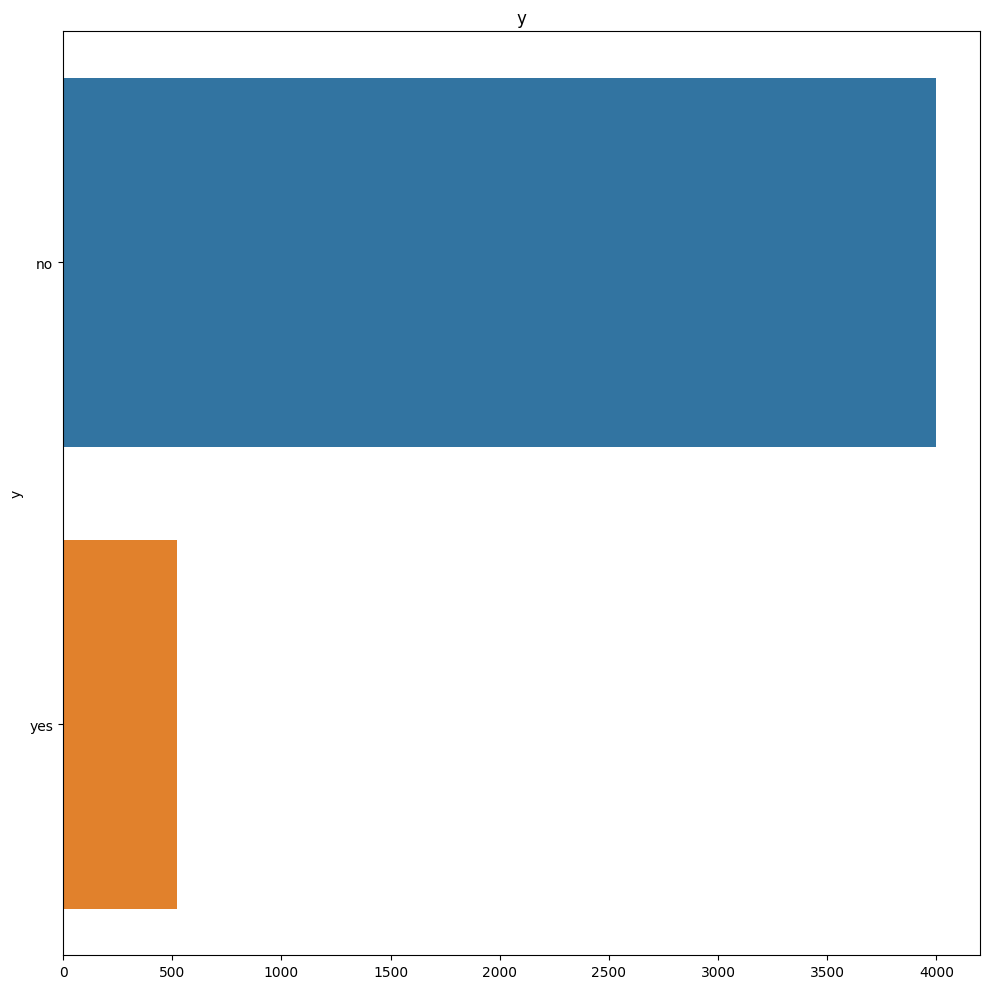

In [14]:
for col in category_feat:
    plt.figure(figsize=(10,10))
    sns.barplot(x=df1[col].value_counts().values, y=df1[col].value_counts().index, data=df1)
    plt.title(col)
    plt.tight_layout()

Summary :
1. Most of the audience work as a 'management', 'blue-collar', 'technician', 'admin.', 'services'.
   sort from the heights to the lowest = 'management', 'blue-collar', 'technician', 'admin.', 
        'services', 'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid', 'student', 
        'unknown'
2. Most of them are married
3. Have a secondary education 
4. Almost all of them doesn't have a credit
5. Most of them have a housing loang
6. Most of them doesn't have a personal loan
7. There been contacted with cellular number, after that unknown and last is used telephone number
8. Last contacted in summer 
9. Most the post outcome is unknown 
10. Most of them hasnt subscribed a deposit
       

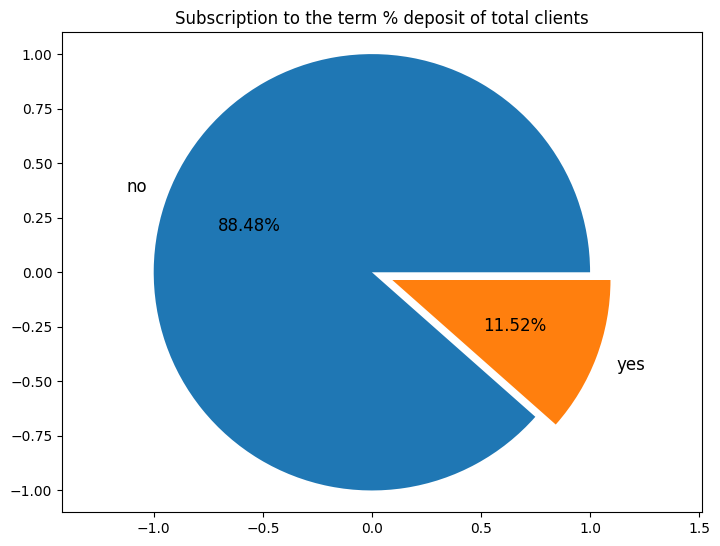

In [15]:
labels = df1['y'].value_counts().index
explode = (0, 0.1)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.pie(df1['y'].value_counts(),
      labels = labels,
      explode = explode,
      autopct = '%1.2f%%',
      frame = True,
      textprops = dict(color = 'black', size = 12))

ax.axis('equal')

plt.title('Subscription to the term % deposit of total clients')
plt.show()

Just 11.52% is subscribed to the term deposit

In [16]:
df1.groupby(['campaign'])['y'].count().reset_index().sort_values(by=['y'], ascending=False).iloc[:5]

campaign     y
0         1  1734
1         2  1264
2         3   558
3         4   325
4         5   167

In [17]:
df1['campaign'].value_counts().iloc[:5]

campaign
1    1734
2    1264
3     558
4     325
5     167
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='job'>

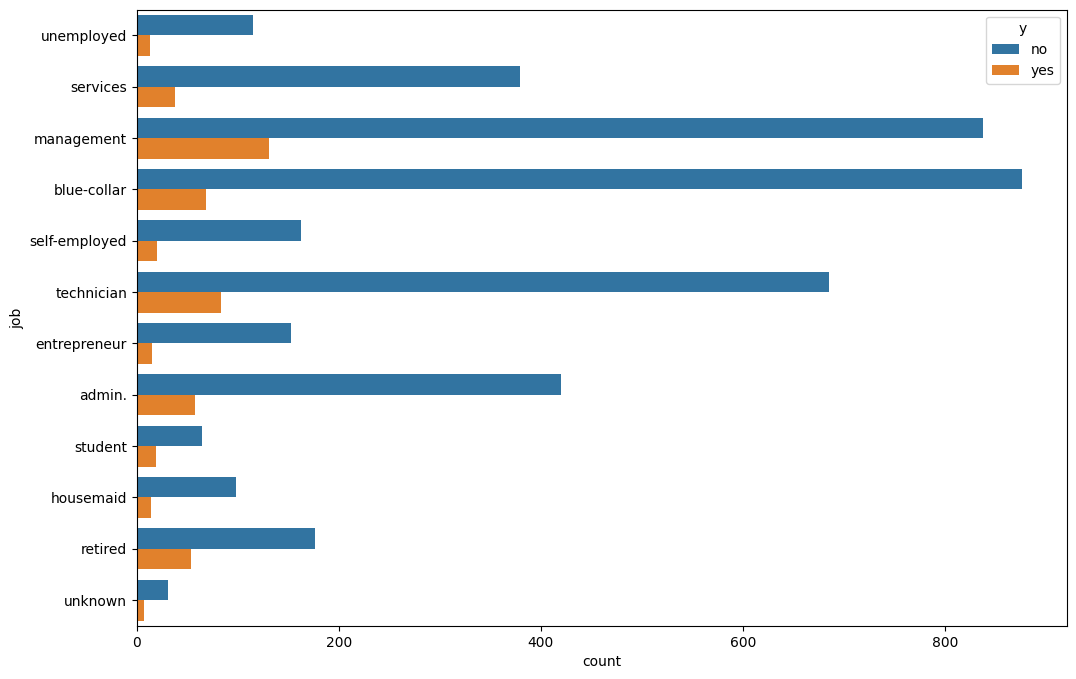

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(y='job', hue='y', data= df1)

1. cross tab is a join table
2. table sum is a sum function used for a data frame with axis where 0 is a index and 1 being a column
3. table div is a divider function used for a data frame 
4. mul is a multipy function used for a data frame
5. round is a round boolean function


In [19]:
table = pd.crosstab(df1.job, df1.y)
table = round(table.div(table.sum(axis=1), axis=0).mul(100),2)
table.columns = ['notsubs', 'subs']
table.sort_values(by=['subs'], ascending=False)

notsubs   subs
job                          
retired          76.52  23.48
student          77.38  22.62
unknown          81.58  18.42
management       86.48  13.52
housemaid        87.50  12.50
admin.           87.87  12.13
self-employed    89.07  10.93
technician       89.19  10.81
unemployed       89.84  10.16
services         90.89   9.11
entrepreneur     91.07   8.93
blue-collar      92.71   7.29

From the plot we can tell that the most subscribed to deposit term is management etch like the hipothesis that we conclude before. But using the frequent of the total each jobs that subcsribed, the most jobs that most likely to have a high frequent to sbuscribed is retired, student and uknown etch like the table from above.

<Axes: xlabel='count', ylabel='marital'>

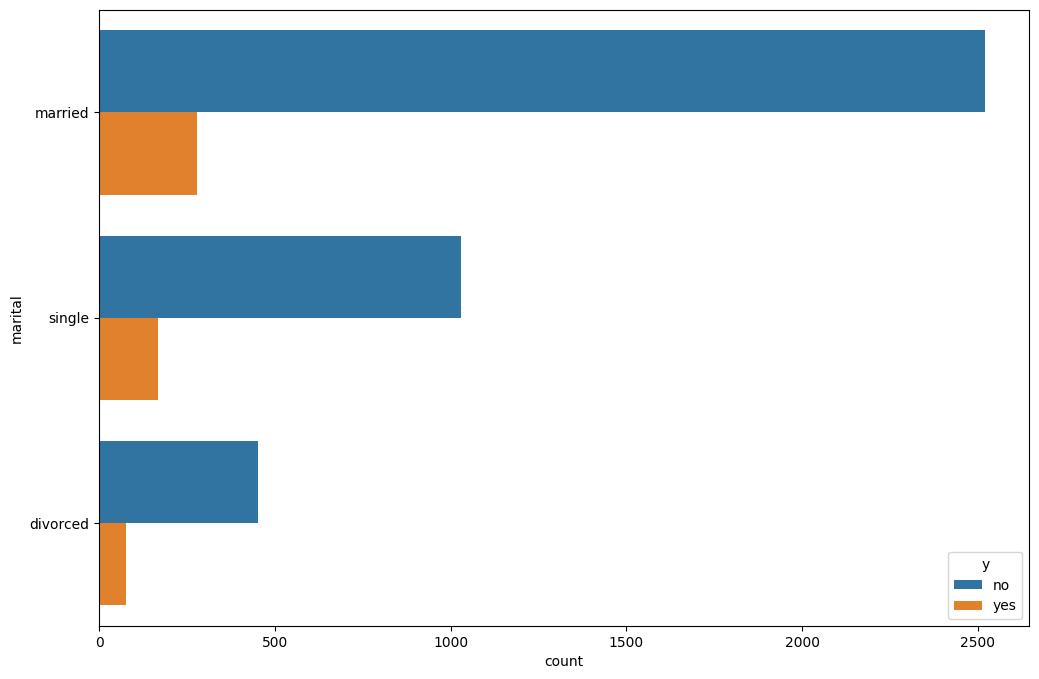

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(y='marital', hue='y', data= df1)

there are no significant impact of the marital status in subscribed of dempost term. But the married is the most subs rather than another

In [21]:
# Wait dont drop the duration col
# df1.drop(['duration'], axis=1, inplace=True)

In [22]:
col =['default', 'housing', 'loan', 'y']

def convert(x):
    return x.map({
        'yes':1,
        'no':0
    })

df1[col] = df1[col].apply(convert)

In [23]:
cat = df1.select_dtypes(include=['bool', 'object'])

In [24]:
cat.head()

job  marital  education   contact month poutcome
0   unemployed  married    primary  cellular   oct  unknown
1     services  married  secondary  cellular   may  failure
2   management   single   tertiary  cellular   apr  failure
3   management  married   tertiary   unknown   jun  unknown
4  blue-collar  married  secondary   unknown   may  unknown

In [25]:
cat_dummies = pd.get_dummies(cat, drop_first=True)
cat_dummies.head()

job_blue-collar  job_entrepreneur  job_housemaid  job_management   
0            False             False          False           False  \
1            False             False          False           False   
2            False             False          False            True   
3            False             False          False            True   
4             True             False          False           False   

   job_retired  job_self-employed  job_services  job_student  job_technician   
0        False              False         False        False           False  \
1        False              False          True        False           False   
2        False              False         False        False           False   
3        False              False         False        False           False   
4        False              False         False        False           False   

   job_unemployed  ...  month_jul  month_jun  month_mar  month_may  month_nov   
0            True  ...      False      False      False      False      False  \
1           False  ...      False      False      False       True      False   
2           False  ...      False      False      False      False      False   
3           False  ...      False       True      False      False      False   
4           False  ...      False      False      False       True      False   

   month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0       True      False           False             False              True  
1      False      False           False             False             False  
2      False      False           False             False             False  
3      False      False           False             False              True  
4      False      False           False             False              True  

[5 rows x 32 columns]

In [26]:
df1 = pd.concat([df1, cat_dummies], axis=1)
df1.drop(columns=cat.columns, axis=1, inplace=True)

In [27]:
df1.head()

age  default  balance  housing  loan  day  duration  campaign  pdays   
0   30        0     1787        0     0   19        79         1     -1  \
1   33        0     4789        1     1   11       220         1    339   
2   35        0     1350        1     0   16       185         1    330   
3   30        0     1476        1     1    3       199         4     -1   
4   59        0        0        1     0    5       226         1     -1   

   previous  ...  month_jul  month_jun  month_mar  month_may  month_nov   
0         0  ...      False      False      False      False      False  \
1         4  ...      False      False      False       True      False   
2         1  ...      False      False      False      False      False   
3         0  ...      False       True      False      False      False   
4         0  ...      False      False      False       True      False   

   month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0       True      False           False             False              True  
1      False      False           False             False             False  
2      False      False           False             False             False  
3      False      False           False             False              True  
4      False      False           False             False              True  

[5 rows x 43 columns]

In [28]:
df1.shape

(4521, 43)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   default              4521 non-null   int64
 2   balance              4521 non-null   int64
 3   housing              4521 non-null   int64
 4   loan                 4521 non-null   int64
 5   day                  4521 non-null   int64
 6   duration             4521 non-null   int64
 7   campaign             4521 non-null   int64
 8   pdays                4521 non-null   int64
 9   previous             4521 non-null   int64
 10  y                    4521 non-null   int64
 11  job_blue-collar      4521 non-null   bool 
 12  job_entrepreneur     4521 non-null   bool 
 13  job_housemaid        4521 non-null   bool 
 14  job_management       4521 non-null   bool 
 15  job_retired          4521 non-null   bool 
 16  job_self-employed    452

In [30]:
X = df1.drop(['y'],axis=1)
y = df1['y']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
print(f'{X_train.shape}')
print(f'{y_train.shape}')
print(f'{X_test.shape}')
print(f'{y_test.shape}')

(3164, 42)
(3164,)
(1357, 42)
(1357,)


In [33]:
check_out = df1[['age','balance','day','duration','campaign','pdays','previous']]
check_out.head()

age  balance  day  duration  campaign  pdays  previous
0   30     1787   19        79         1     -1         0
1   33     4789   11       220         1    339         4
2   35     1350   16       185         1    330         1
3   30     1476    3       199         4     -1         0
4   59        0    5       226         1     -1         0

In [34]:
check_out.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

age       balance          day     duration     campaign   
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000  \
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
90%      56.000000   3913.000000    28.000000   579.000000     6.000000   
95%      59.000000   6102.000000    30.000000   763.000000     8.000000   
99%      72.000000  14194.600000    31.000000  1259.000000    16.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
90%     183.000000     2.000000  
95%     317.000000     3.000000  
99%     370.000000     8.000000  
max     871.000000    25.000000

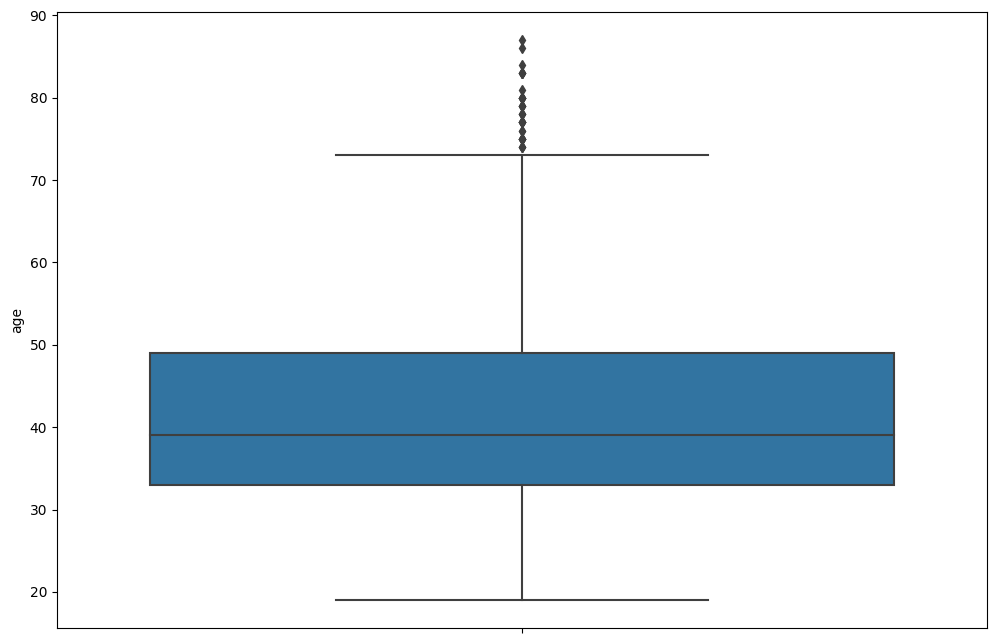

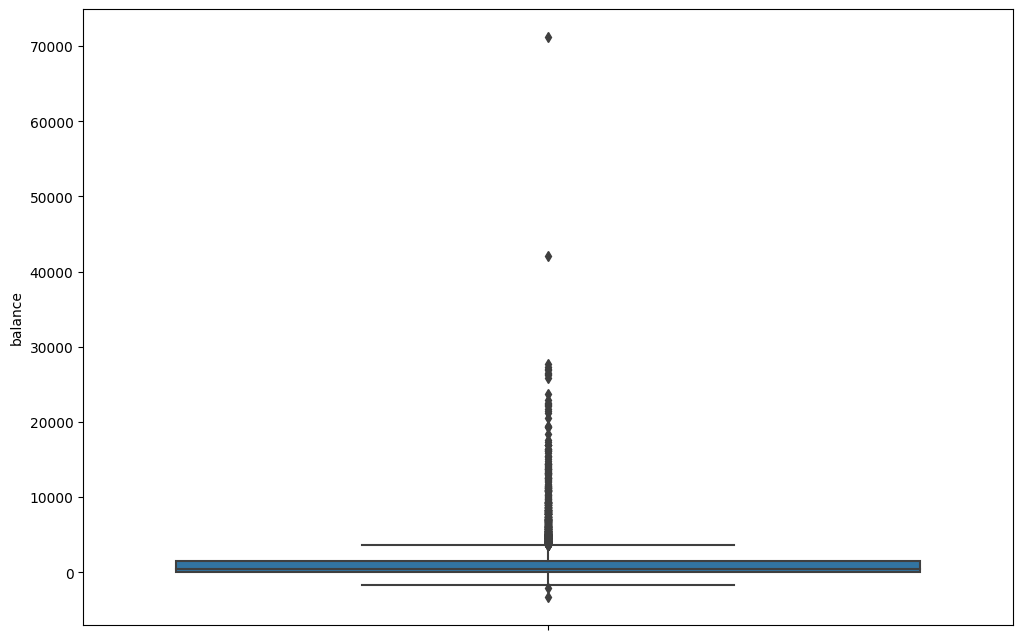

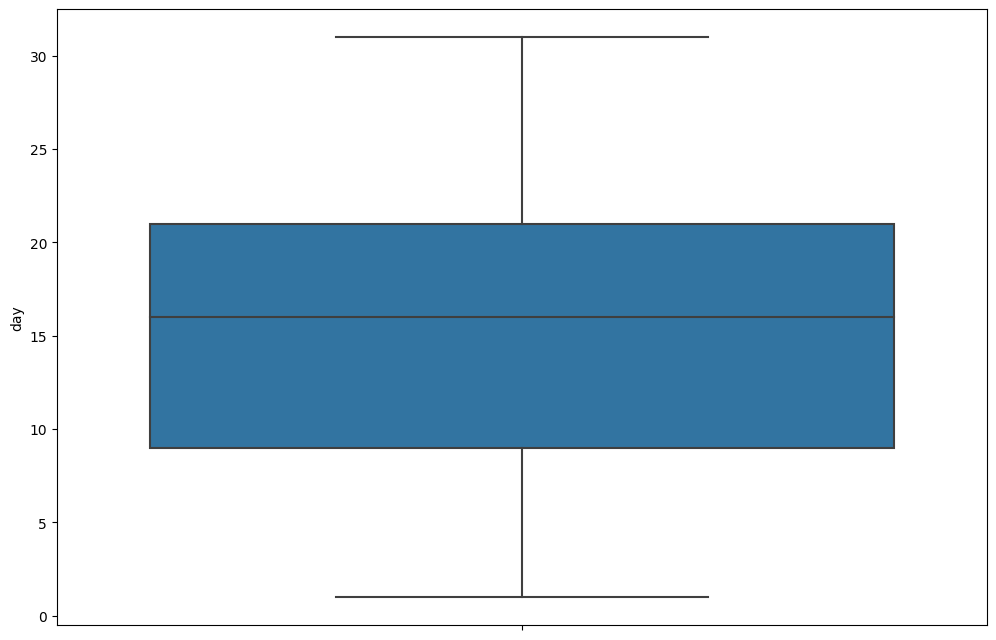

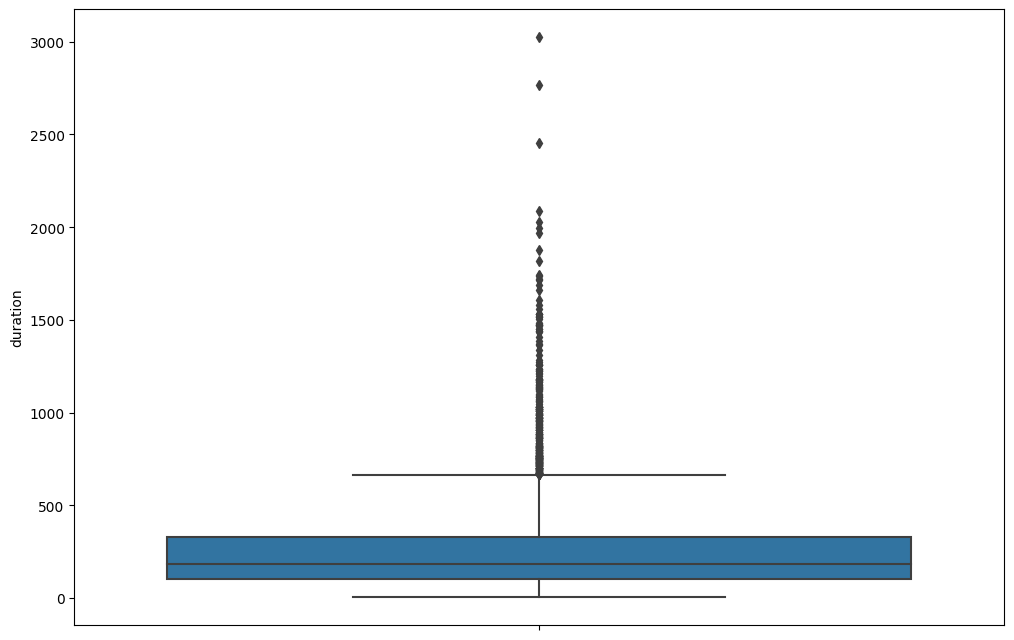

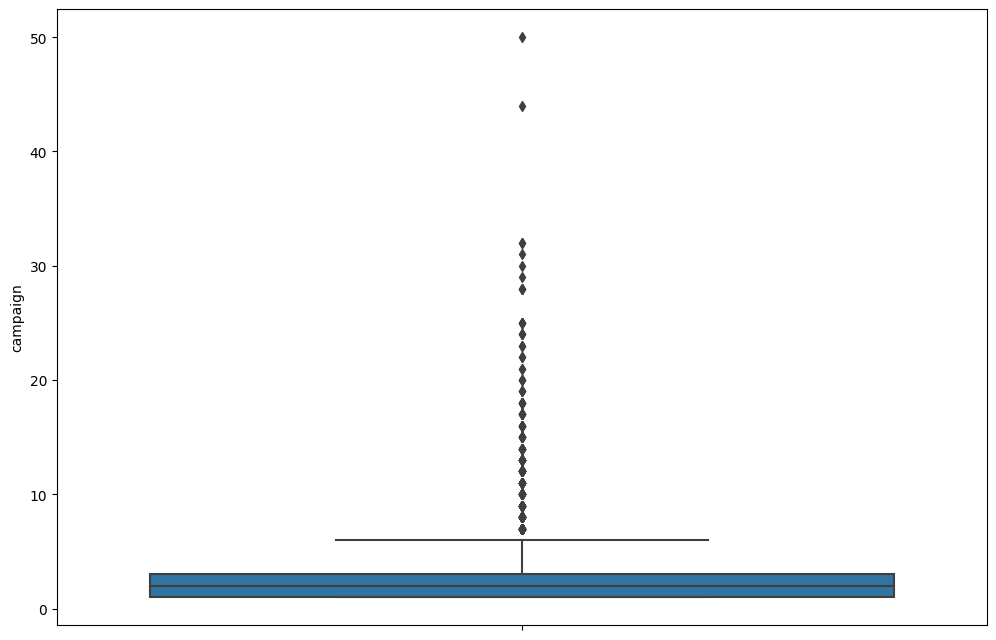

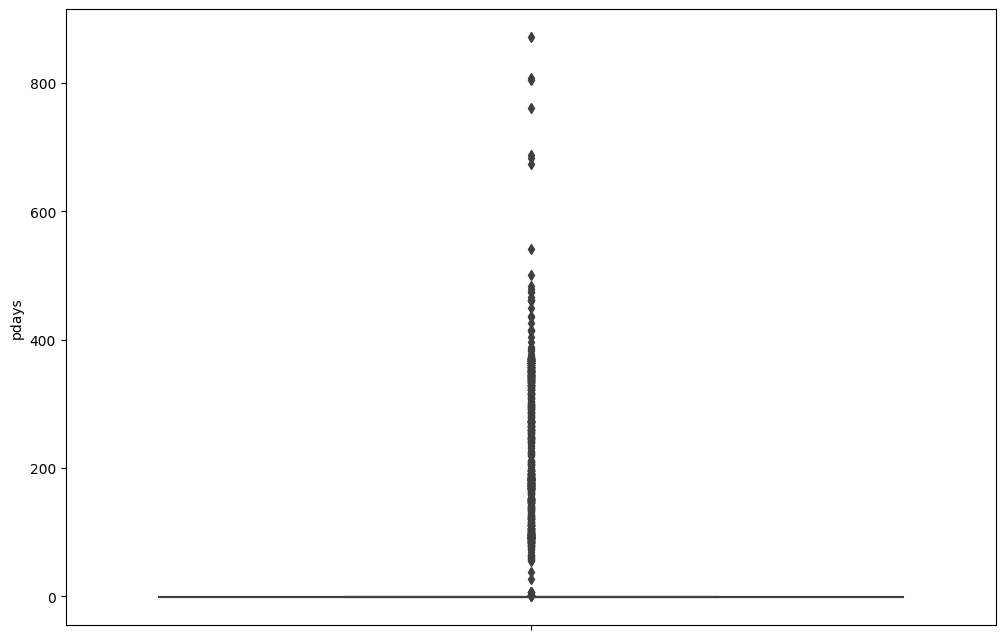

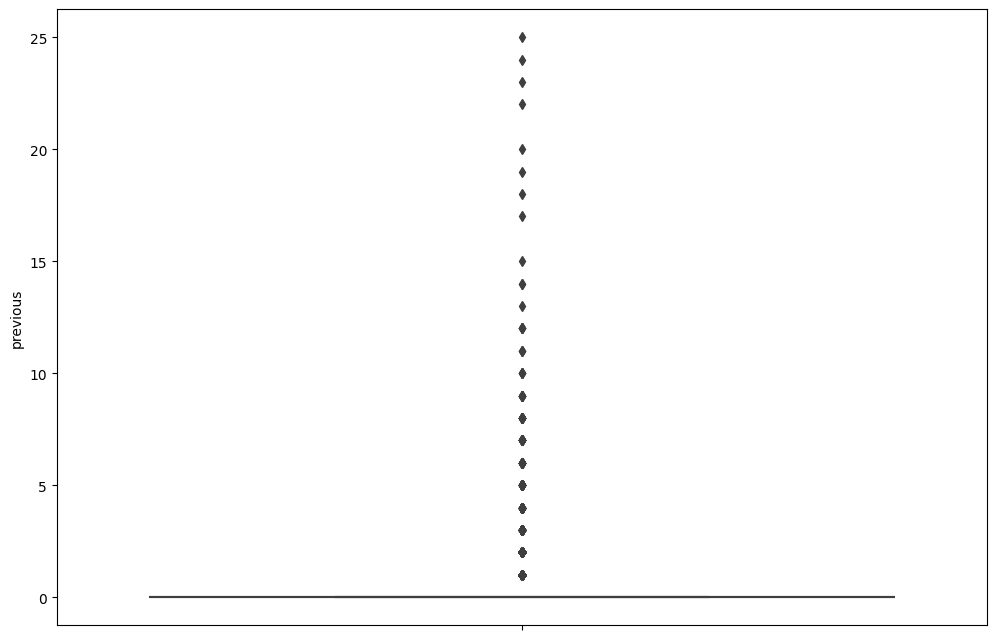

In [35]:
for data in check_out:
    plt.figure(figsize=(12,8))
    sns.boxplot(y=data, data=df1)

In [36]:
X = df1.drop(columns=['y'])
y = df1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
print(f'X_train = {X_train.shape}')
print(f'y_train = {y_train.shape}')
print(f'X_test = {X_test.shape}')
print(f'y_test = {y_test.shape}')

X_train = (3616, 42)
y_train = (3616,)
X_test = (905, 42)
y_test = (905,)


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

X_train[['age','balance','day','duration','campaign','pdays','previous']] = scaler.fit_transform(X_train[['age','balance','day','duration','campaign','pdays','previous']])

In [40]:
X_train.head()

age  default   balance  housing  loan       day  duration   
4383 -1.424566        0 -0.267050        0     0  1.469094 -0.587694  \
502  -0.954863        0 -0.462516        0     0  1.469094 -0.595664   
4052  1.017888        0 -0.460220        1     0  1.469094 -0.348595   
3634  1.205770        0 -0.416601        1     1  1.226648 -0.739123   
3088 -0.954863        0  0.367560        0     0 -0.106808 -0.029796   

      campaign     pdays  previous  ...  month_jul  month_jun  month_mar   
4383 -0.586848 -0.404991 -0.314372  ...      False      False      False  \
502   0.713622 -0.404991 -0.314372  ...      False      False      False   
4052 -0.586848 -0.404991 -0.314372  ...      False      False      False   
3634 -0.586848 -0.404991 -0.314372  ...      False      False      False   
3088 -0.586848  1.446382  1.409749  ...       True      False      False   

      month_may  month_nov  month_oct  month_sep  poutcome_other   
4383      False      False      False      False           False  \
502       False      False      False      False           False   
4052      False      False      False      False           False   
3634       True      False      False      False           False   
3088      False      False      False      False           False   

      poutcome_success  poutcome_unknown  
4383             False              True  
502              False              True  
4052             False              True  
3634             False              True  
3088              True             False  

[5 rows x 42 columns]

In [41]:
import statsmodels.api as sm

In [44]:
logm = sm.GLM(y_train, (sm.add_constant(X_train)), family= sm.families.Binomial())
logm.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [46]:
logReg = LogisticRegression()

In [48]:
logReg.fit(X_train, y_train)

LogisticRegression()

In [49]:
logReg.score(X_train, y_train)

0.9054203539823009

In [50]:
logReg.score(X_test, y_test)

0.24972375690607734

In [47]:
rfe = RFE(logReg, 20)
rfe = rfe.fit(X_train, y_train)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [36]:
numeric_feats = X_train.select_dtypes(include=['float64', 'int64']).columns.values
numeric_feats

array(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous'], dtype=object)

In [178]:
category_feats = X_train.select_dtypes(include=['bool', 'object']).columns.values
category_feats

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome'], dtype=object)

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
df = pd.read_csv('bank.csv', delimiter=';')
df.head()

age          job  marital  education default  balance housing loan   
0   30   unemployed  married    primary      no     1787      no   no  \
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [209]:
col = ['default', 'housing', 'loan', 'y']

def convert(x):
    return x.map({
        'yes':1,
        'no':0
    })

df[col] =df[col].apply(convert)

In [213]:
df.head()

age          job  marital  education  default  balance  housing  loan   
0   30   unemployed  married    primary        0     1787        0     0  \
1   33     services  married  secondary        0     4789        1     1   
2   35   management   single   tertiary        0     1350        1     0   
3   30   management  married   tertiary        0     1476        1     1   
4   59  blue-collar  married  secondary        0        0        1     0   

    contact  day month  duration  campaign  pdays  previous poutcome  y  
0  cellular   19   oct        79         1     -1         0  unknown  0  
1  cellular   11   may       220         1    339         4  failure  0  
2  cellular   16   apr       185         1    330         1  failure  0  
3   unknown    3   jun       199         4     -1         0  unknown  0  
4   unknown    5   may       226         1     -1         0  unknown  0

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   int64 
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   int64 
 7   loan       4521 non-null   int64 
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(11), object(6)
memory usage: 600.6+ KB


In [222]:
cat_df_cols = df.select_dtypes(include=['object', 'bool']).columns.values
cat_df_cols

array(['job', 'marital', 'education', 'contact', 'month', 'poutcome'],
      dtype=object)

In [223]:
for col in cat_df_cols:
    print(f'{df[col].value_counts()}\n')

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64

poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64



In [225]:
cat_df = df.select_dtypes(include=['bool', object])
cat_df

job  marital  education   contact month poutcome
0        unemployed  married    primary  cellular   oct  unknown
1          services  married  secondary  cellular   may  failure
2        management   single   tertiary  cellular   apr  failure
3        management  married   tertiary   unknown   jun  unknown
4       blue-collar  married  secondary   unknown   may  unknown
...             ...      ...        ...       ...   ...      ...
4516       services  married  secondary  cellular   jul  unknown
4517  self-employed  married   tertiary   unknown   may  unknown
4518     technician  married  secondary  cellular   aug  unknown
4519    blue-collar  married  secondary  cellular   feb    other
4520   entrepreneur   single   tertiary  cellular   apr    other

[4521 rows x 6 columns]

In [227]:
cat_dummies = pd.get_dummies(cat_df, drop_first=True)
cat_dummies.head()

job_blue-collar  job_entrepreneur  job_housemaid  job_management   
0            False             False          False           False  \
1            False             False          False           False   
2            False             False          False            True   
3            False             False          False            True   
4             True             False          False           False   

   job_retired  job_self-employed  job_services  job_student  job_technician   
0        False              False         False        False           False  \
1        False              False          True        False           False   
2        False              False         False        False           False   
3        False              False         False        False           False   
4        False              False         False        False           False   

   job_unemployed  ...  month_jul  month_jun  month_mar  month_may  month_nov   
0            True  ...      False      False      False      False      False  \
1           False  ...      False      False      False       True      False   
2           False  ...      False      False      False      False      False   
3           False  ...      False       True      False      False      False   
4           False  ...      False      False      False       True      False   

   month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0       True      False           False             False              True  
1      False      False           False             False             False  
2      False      False           False             False             False  
3      False      False           False             False              True  
4      False      False           False             False              True  

[5 rows x 32 columns]

In [231]:
df = pd.concat([df, cat_dummies], axis=1)
df.drop(columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], axis=1, inplace=True)

In [242]:
df

age  default  balance  housing  loan  day  duration  campaign  pdays   
0      30        0     1787        0     0   19        79         1     -1  \
1      33        0     4789        1     1   11       220         1    339   
2      35        0     1350        1     0   16       185         1    330   
3      30        0     1476        1     1    3       199         4     -1   
4      59        0        0        1     0    5       226         1     -1   
...   ...      ...      ...      ...   ...  ...       ...       ...    ...   
4516   33        0     -333        1     0   30       329         5     -1   
4517   57        1    -3313        1     1    9       153         1     -1   
4518   57        0      295        0     0   19       151        11     -1   
4519   28        0     1137        0     0    6       129         4    211   
4520   44        0     1136        1     1    3       345         2    249   

      previous  ...  month_jul  month_jun  month_mar  month_may  month_nov   
0            0  ...      False      False      False      False      False  \
1            4  ...      False      False      False       True      False   
2            1  ...      False      False      False      False      False   
3            0  ...      False       True      False      False      False   
4            0  ...      False      False      False       True      False   
...        ...  ...        ...        ...        ...        ...        ...   
4516         0  ...       True      False      False      False      False   
4517         0  ...      False      False      False       True      False   
4518         0  ...      False      False      False      False      False   
4519         3  ...      False      False      False      False      False   
4520         7  ...      False      False      False      False      False   

      month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0          True      False           False             False              True  
1         False      False           False             False             False  
2         False      False           False             False             False  
3         False      False           False             False              True  
4         False      False           False             False              True  
...         ...        ...             ...               ...               ...  
4516      False      False           False             False              True  
4517      False      False           False             False              True  
4518      False      False           False             False              True  
4519      False      False            True             False             False  
4520      False      False            True             False             False  

[4521 rows x 107 columns]

In [245]:
check_outliners = df[['age','balance','day','duration','campaign','pdays','previous']]
check_outliners.head()

age  balance  day  duration  campaign  pdays  previous
0   30     1787   19        79         1     -1         0
1   33     4789   11       220         1    339         4
2   35     1350   16       185         1    330         1
3   30     1476    3       199         4     -1         0
4   59        0    5       226         1     -1         0

In [246]:
check_outliners.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

age       balance          day     duration     campaign   
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000  \
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
90%      56.000000   3913.000000    28.000000   579.000000     6.000000   
95%      59.000000   6102.000000    30.000000   763.000000     8.000000   
99%      72.000000  14194.600000    31.000000  1259.000000    16.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
90%     183.000000     2.000000  
95%     317.000000     3.000000  
99%     370.000000     8.000000  
max     871.000000    25.000000

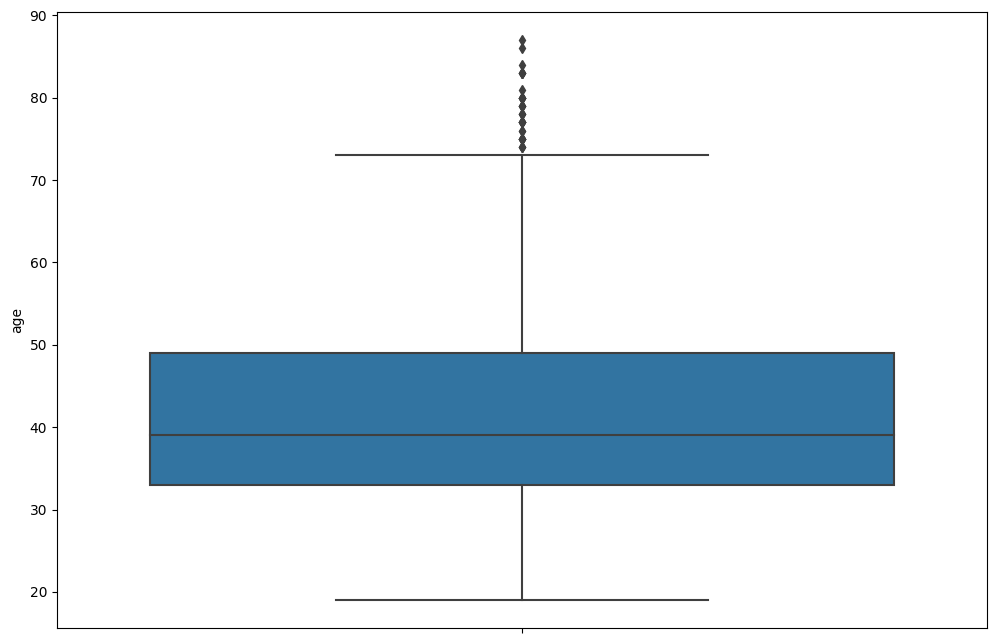

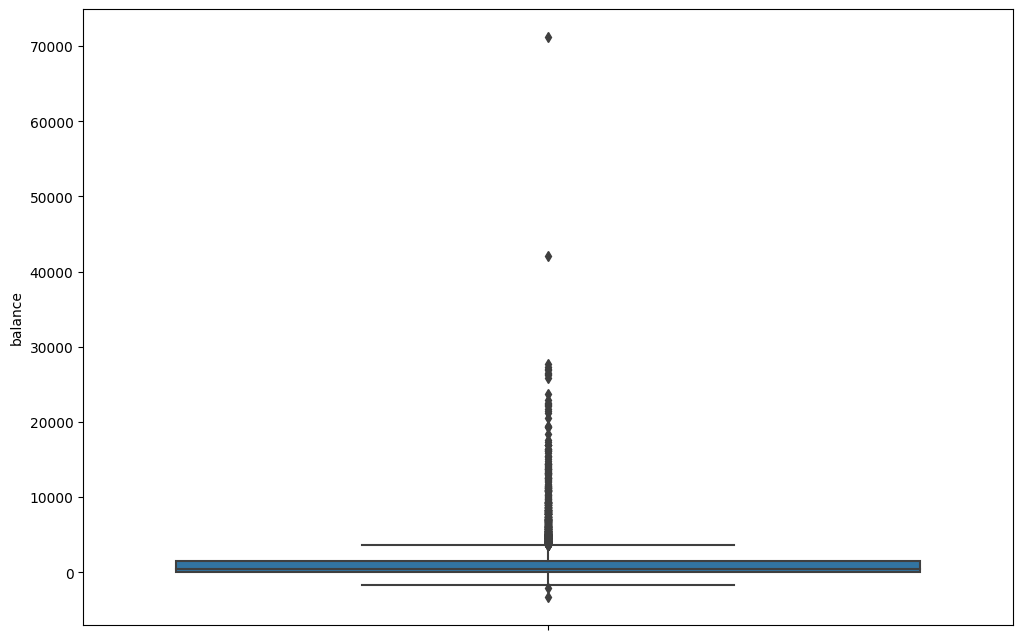

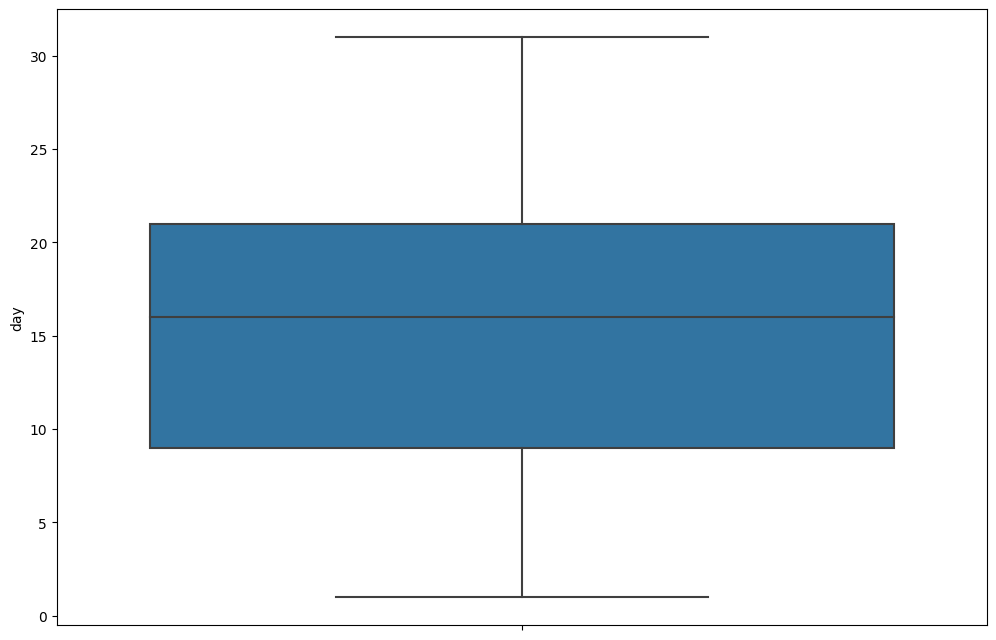

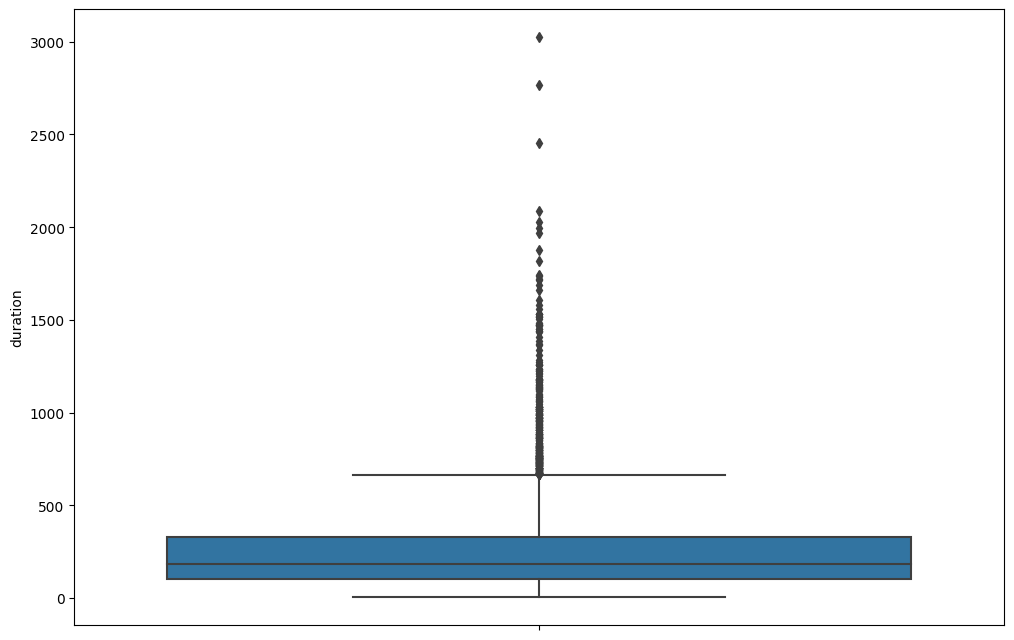

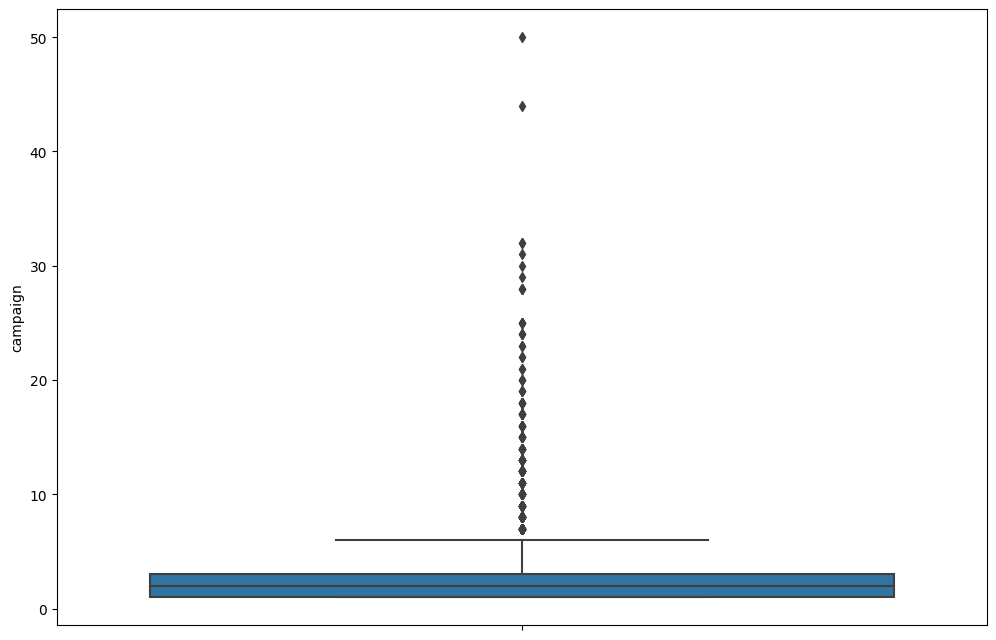

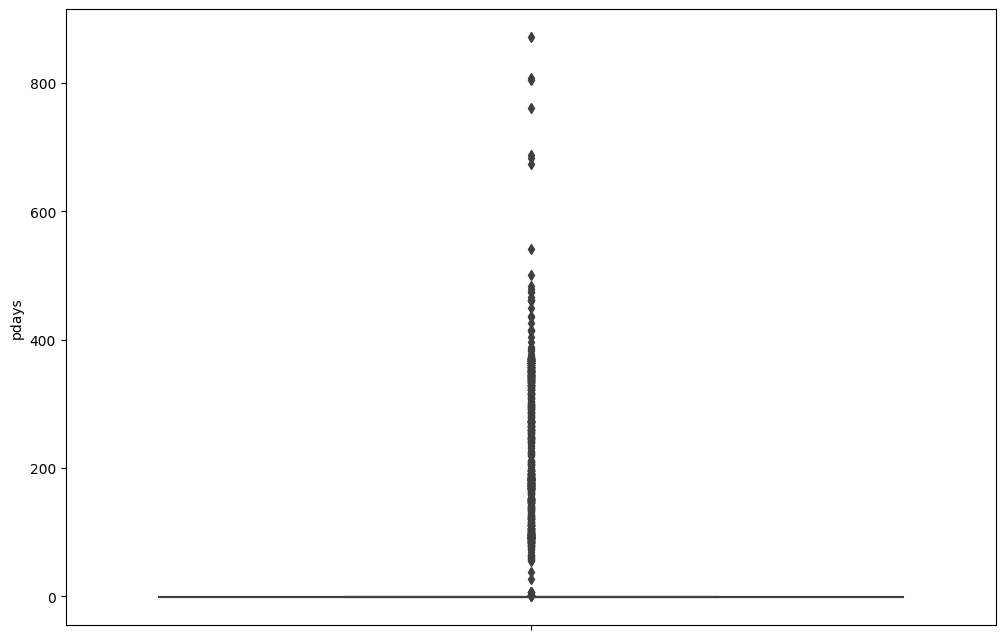

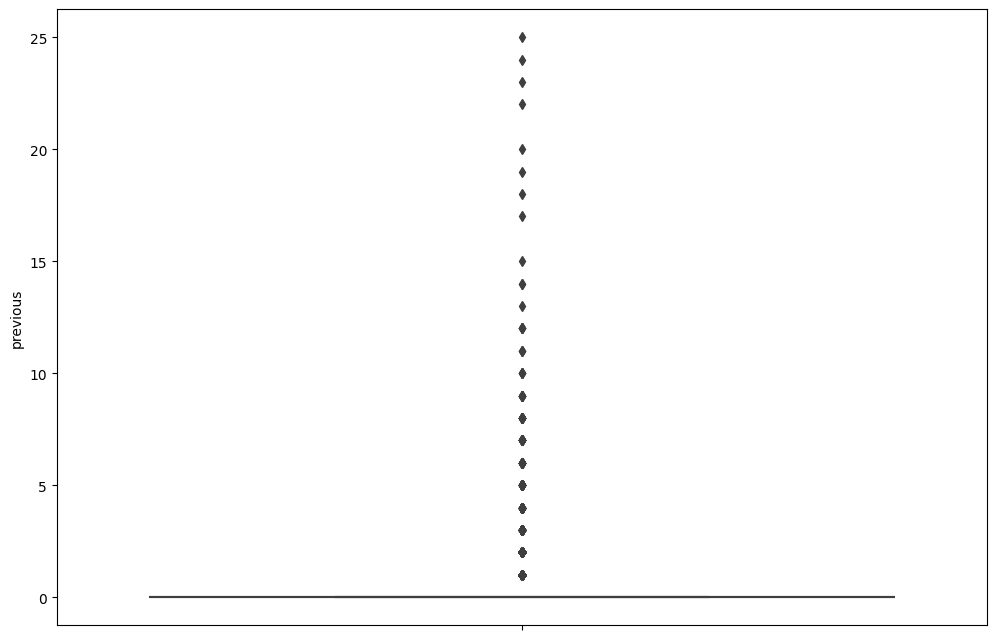

In [249]:
for cols in check_outliners:
    plt.figure(figsize=(12,8))
    sns.boxplot(y=cols, data= df)

In [252]:
plt.figure(figsize=(100,100))
sns.heatmap(df.corr(), annot=True)

<Axes: >

In [257]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous',
       ...
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object', length=107)